<a href="https://colab.research.google.com/github/SanjayS2348553/AiML/blob/main/2348553_lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder


In [21]:
df=pd.read_csv('/content/Invistico_Airline.csv')

In [22]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [23]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [24]:
df.sample(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
35164,dissatisfied,Female,Loyal Customer,53,Personal Travel,Eco,863,4,4,4,...,4,3,3,4,3,5,3,5,20,5.0
124295,satisfied,Male,Loyal Customer,28,Business travel,Eco Plus,1759,5,1,4,...,5,5,2,5,4,1,3,5,0,0.0
83518,dissatisfied,Female,Loyal Customer,35,Business travel,Eco,3584,3,5,4,...,3,3,4,4,3,2,3,3,94,73.0
126430,satisfied,Male,Loyal Customer,42,Business travel,Eco,2646,5,2,2,...,5,3,4,4,3,5,3,5,244,285.0
61995,satisfied,Male,disloyal Customer,39,Business travel,Eco,1799,5,1,5,...,2,2,2,5,3,3,3,2,0,0.0
112280,satisfied,Male,Loyal Customer,39,Business travel,Business,3122,1,1,1,...,4,4,4,5,4,4,4,5,0,0.0
35660,satisfied,Male,Loyal Customer,49,Personal Travel,Eco,2942,4,4,4,...,4,4,3,2,4,3,5,4,3,0.0
5034,dissatisfied,Male,Loyal Customer,12,Personal Travel,Eco,1893,1,4,1,...,5,5,2,5,4,4,4,5,0,0.0
9962,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,374,1,1,1,...,3,4,4,4,4,2,4,2,6,12.0
64246,satisfied,Male,Loyal Customer,41,Business travel,Business,1598,0,0,0,...,5,4,4,4,4,5,4,5,31,29.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [26]:
# Filling null values
for col in df.select_dtypes(["int64","float64"]).columns:
  df[col]=df[col].fillna(df[col].mean())
  print(df[col].mean())

39.42795657530028
1981.409054511857
2.838597166615337
2.990645210963967
2.851994148444718
2.990421927933477
3.2491299661225748
3.3834770557437635
3.519702802587003
3.4721050200184784
3.465075454265476
3.485902371419772
3.695672928857407
3.3408068986757007
3.7057591623036648
3.3525870033877427
14.713712657838004
15.09112883918849


In [30]:
# Convert categorical variables to numerical values
le=LabelEncoder()
df['satisfaction']=le.fit_transform(df['satisfaction'])
df['Gender']=le.fit_transform(df['Gender'])
df['Customer Type']=le.fit_transform(df['Customer Type'])

In [28]:
df['Age'].mean()

39.42795657530028

In [31]:
df.sample(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
125414,1,1,0,50,Business travel,Business,1104,2,2,2,...,4,5,5,5,5,4,5,4,0,2.0
20078,0,1,0,23,Personal Travel,Eco,2008,3,0,3,...,1,1,3,5,3,5,5,1,1,0.0
125428,1,0,0,19,Business travel,Business,2563,4,4,4,...,5,5,4,5,4,2,1,5,0,30.0
18610,0,1,0,33,Personal Travel,Eco,4111,2,5,2,...,1,4,5,3,4,1,5,1,2,45.0
65383,1,1,0,39,Business travel,Business,2565,0,4,0,...,5,4,4,4,4,4,4,4,14,11.0
23998,0,1,0,14,Personal Travel,Eco,1511,3,3,5,...,2,2,3,5,3,1,3,2,0,2.0
91755,1,0,0,43,Business travel,Business,494,3,3,3,...,5,4,4,4,4,4,4,4,33,28.0
72620,1,0,0,40,Business travel,Business,2249,5,5,5,...,5,2,2,2,2,4,2,4,0,0.0
35140,0,0,0,64,Personal Travel,Eco,953,4,4,4,...,5,4,4,4,4,3,4,3,20,41.0
23454,1,0,0,63,Personal Travel,Eco,225,4,4,4,...,5,4,5,5,5,5,3,5,0,0.0


In [32]:
# Define age bins
age_bins = [18, 25, 35, 45, np.inf]
age_labels = ['18-25', '26-35', '36-45', '46+']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [33]:
df['satisfaction']

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [34]:
print(df['Age'])

0         65
1         47
2         15
3         60
4         70
          ..
129875    29
129876    63
129877    69
129878    66
129879    38
Name: Age, Length: 129880, dtype: int64


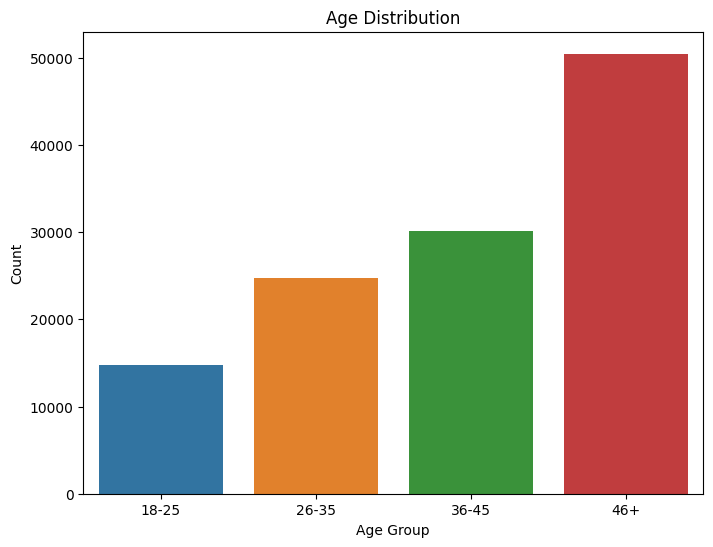

In [35]:
# Create a bar plot for age distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', data=df)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [36]:
#Creating covariance matrix to determine the relation between 'Age' and 'satisfaction'
cov_matrix = np.cov(df['Age'], df['satisfaction'])
print(cov_matrix)

[[228.59504531   0.88782521]
 [  0.88782521   0.24776194]]


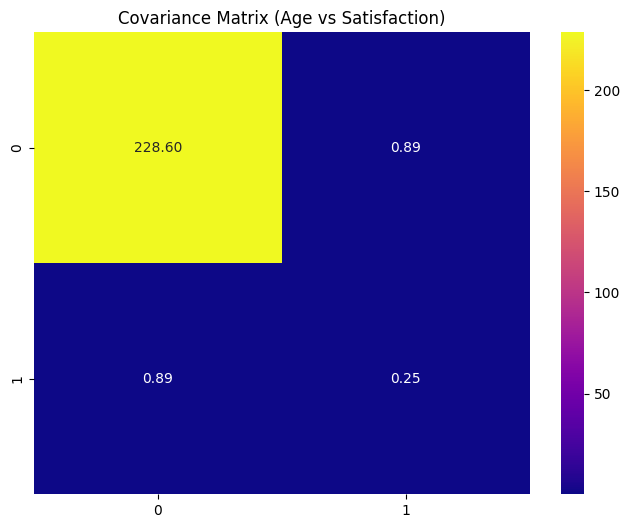

In [39]:
#Plotting heatmap for the above Covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Covariance Matrix (Age vs Satisfaction)')
plt.show()

In [40]:
# Perform chi-squared test for association between Gender and Satisfaction
contingency_table = pd.crosstab(df['Gender'], df['satisfaction'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results of chi-squared test
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 5849.476393129708
P-value: 0.0


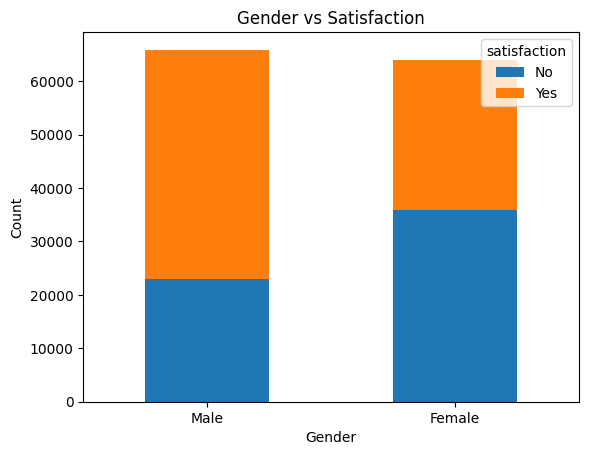

In [41]:
# Create a stacked bar plot for Gender vs Satisfaction
stacked_bar = contingency_table.plot(kind='bar', stacked=True)
plt.title('Gender vs Satisfaction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.legend(title='satisfaction', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [42]:
# Perform independent t-test for Seat comfort between satisfied and dissatisfied customers
repeat_ratings = df[df['satisfaction'] == 1]['Seat comfort']
non_repeat_ratings = df[df['satisfaction'] == 0]['Seat comfort']
t_stat, p_value = ttest_ind(repeat_ratings, non_repeat_ratings)

# Display results of t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 90.03680446617015
P-value: 0.0


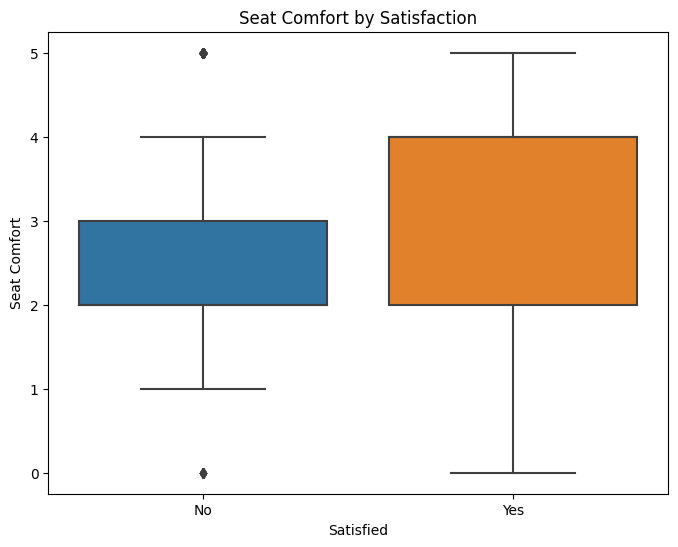

In [43]:
# Create box plots for Seat comfort by satisfied groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction', y='Seat comfort', data=df)
plt.title('Seat Comfort by Satisfaction')
plt.xlabel('Satisfied')
plt.ylabel('Seat Comfort')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()